In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import metrics
from sklearn.preprocessing import Imputer
# ML Algorithms
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("./train.csv") #load train data
df_copy = df.copy()
df_plot = df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


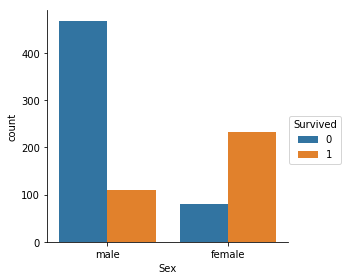

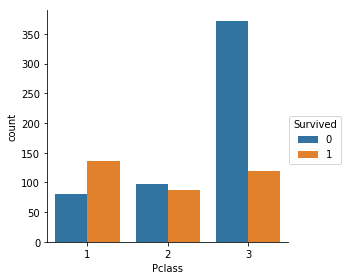

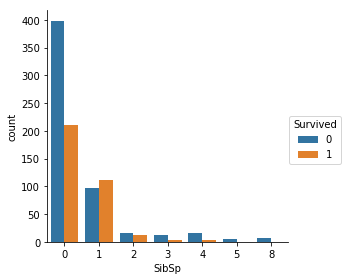

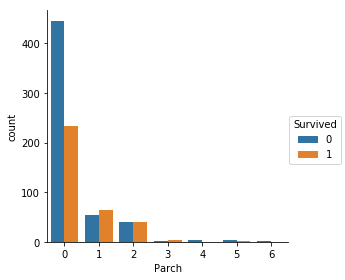

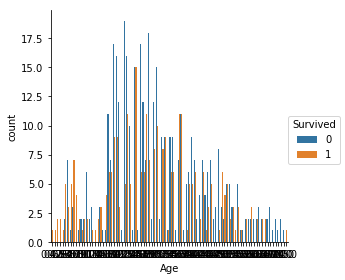

In [3]:
sns.factorplot('Sex', data = df_plot, kind = 'count', hue='Survived')
sns.factorplot('Pclass', data = df_plot, kind = 'count', hue='Survived')
sns.factorplot('SibSp', data = df_plot, kind = 'count', hue='Survived')
sns.factorplot('Parch', data = df_plot, kind = 'count', hue='Survived')
sns.factorplot('Age', data = df_plot, kind = 'count', hue='Survived')


In [4]:
del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']
del df['Fare']

In [5]:
df[['SibSp', 'Parch']] = df[['SibSp', 'Parch']].fillna(value=0)
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
df = df.dropna()

In [7]:
df.isnull().values.any()

False

In [8]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 2})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Embarked'] = df['Embarked'].astype(int)

In [9]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [10]:
df['SibSp'] = pd.cut(df['SibSp'], [-1,0,200], labels=[0, 1])

In [11]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [12]:
df['Parch'] = pd.cut(df['Parch'], [-1,0,200], labels=[0, 1])

In [13]:
df['Age'].min()


0.42

In [14]:
df['Age'].max()

80.0

In [15]:
df['Age'] = pd.cut(df['Age'], [-1,20,200], labels=[0, 1])

In [16]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size=0.3, random_state=42)

In [17]:
feature_col_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
predicted_class_name=['Survived']
X_train= df_train[feature_col_names].values #predictor feature columns (10 x m)
y_train=df_train[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)
X_test=df_test[feature_col_names].values #predictor feature columns (10 x m)
y_test=df_test[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)

In [18]:
rf_model = RandomForestClassifier()      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
# training metrics
#print("Training data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

print('Model Performance')
#print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#print('Accuracy = {:0.2f}%.'.format(accuracy))
default_accuracy=metrics.accuracy_score(y_test, rf_predict_test)
# training metrics
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))



Model Performance
Train data Accuracy: 0.8521
Test data Accuracy: 0.7790


In [19]:

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

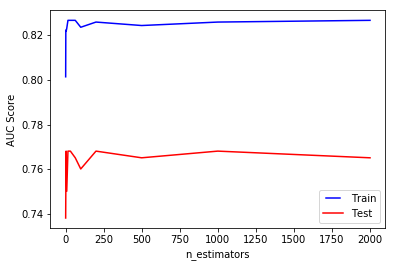

In [20]:
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,500,1000,2000]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

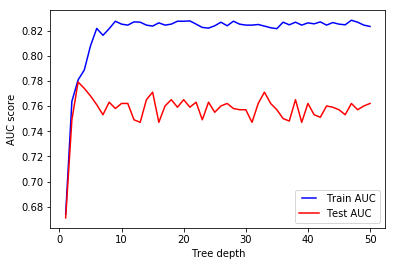

In [21]:
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

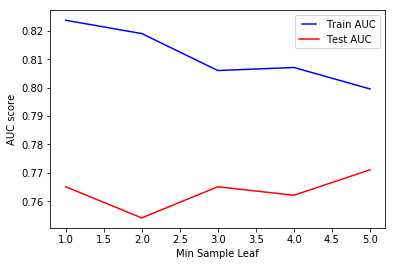

In [22]:
min_samples_leaf = [1,2,3,4,5]
train_results = []
test_results = []
for min_samples_l in min_samples_leaf:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_l, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Sample Leaf')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


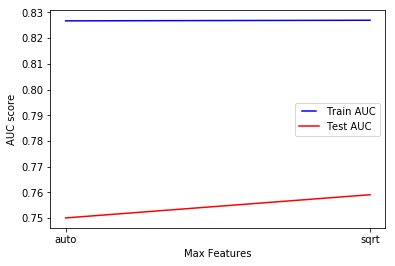

In [23]:
max_features = ['auto', 'sqrt']
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max Features')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-pa

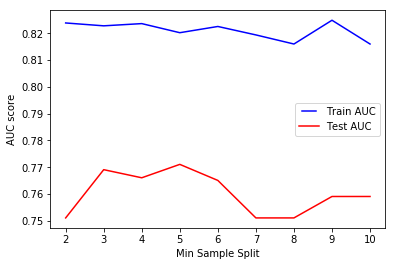

In [24]:
min_samples_split = [2,3,4,5,6,7,8,9,10]
train_results = []
test_results = []
for mss in min_samples_split:
    rf = RandomForestClassifier(min_samples_split=mss, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(min_samples_split, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Sample Split')
plt.show()

/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/contagious/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


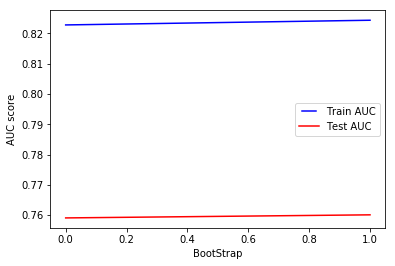

In [25]:
bootstrap = [True, False]
train_results = []
test_results = []
for bt in bootstrap:
    rf = RandomForestClassifier(bootstrap=bt, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)

line1, = plt.plot(bootstrap, train_results, 'b', label='Train AUC')
line2, = plt.plot(bootstrap, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('BootStrap')
plt.show()

In [26]:
# Number of trees in random forest -OK
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 350, num = 50)]
# Number of features to consider at every split -OK
max_features = [ 'auto'] 
# Maximum number of levels in tree - OK
max_depth = [int(x) for x in np.linspace(1, 16, num = 6)]
# Minimum number of samples required to split a node -OK
min_samples_split = [7,8,9]
# Minimum number of samples required at each leaf node -OK
min_samples_leaf = [5,6,7,8]
# Method of selecting samples for training each tree - OK
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#pprint(random_grid)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cross_validation import cross_val_score

/home/contagious/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.ravel());

rf_random_train = rf_random.predict(X_train)
rf_random_test = rf_random.predict(X_test)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=334, min_samples_split=9, min_samples_leaf=5, max_features=auto, max_depth=13, bootstrap=True 
[CV] n_estimators=334, min_samples_split=9, min_samples_leaf=5, max_features=auto, max_depth=13, bootstrap=True 
[CV] n_estimators=334, min_samples_split=9, min_samples_leaf=5, max_features=auto, max_depth=13, bootstrap=True 
[CV] n_estimators=334, min_samples_split=9, min_samples_leaf=5, max_features=auto, max_depth=13, bootstrap=True 
[CV]  n_estimators=334, min_samples_split=9, min_samples_leaf=5, max_features=auto, max_depth=13, bootstrap=True, total=   0.6s
[CV] n_estimators=334, min_samples_split=9, min_samples_leaf=5, max_features=auto, max_depth=13, bootstrap=True 
[CV]  n_estimators=334, min_samples_split=9, min_samples_leaf=5, max_features=auto, max_depth=13, bootstrap=True, total=   0.6s
[CV] n_estimators=326, min_samples_split=8, min_samples_leaf=7, max_features=auto, max_depth=7, bootstrap=True 
[CV]  

[CV]  n_estimators=302, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=4, bootstrap=True, total=   0.5s
[CV] n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True 
[CV]  n_estimators=302, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=4, bootstrap=True, total=   0.5s
[CV] n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True 
[CV]  n_estimators=302, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=4, bootstrap=True, total=   0.5s
[CV] n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True 
[CV]  n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True, total=   0.5s
[CV] n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s


[CV]  n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True, total=   0.5s
[CV] n_estimators=306, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True, total=   0.5s
[CV] n_estimators=306, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True, total=   0.5s
[CV] n_estimators=306, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=304, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=1, bootstrap=True, total=   0.5s
[CV] n_estimators=306, min_samples_split=8, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=306, min_samples_split=8,

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.3s finished


In [29]:
rf_random.best_params_

{'n_estimators': 339,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

In [34]:
random_accuracy=metrics.accuracy_score(y_test, rf_random_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_random_train)))
print("Test data Accuracy: {0:.4f}".format(random_accuracy))

Train data Accuracy: 0.8376
Test data Accuracy: 0.8015


In [35]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - default_accuracy) / default_accuracy))

Improvement of 2.88%.


In [32]:
# Number of trees in random forest -OK
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 210, num = 9)]
# Number of features to consider at every split -OK
max_features = [ 'sqrt'] 
# Maximum number of levels in tree - OK
max_depth = [int(x) for x in np.linspace(10, 40, num = 5)]
# Minimum number of samples required to split a node -OK
min_samples_split = [7,8,9]
# Minimum number of samples required at each leaf node -OK
min_samples_leaf = [2,3,4,5,6,7,8]
# Method of selecting samples for training each tree - OK
bootstrap = [True]

# Create the  grid
p_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#pprint(random_grid)


In [33]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf_model,param_grid=p_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)

rf_grid.fit(X_train, y_train.ravel());

rf_grid_train = rf_grid.predict(X_train)
rf_grid_test = rf_grid.predict(X_test)

Fitting 5 folds for each of 945 candidates, totalling 4725 fits
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.3s
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[C

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s


[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=205 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=205 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=202 
[CV]  bootstrap=True, max_depth=10, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.3s


[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=210, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=207, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=207, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=205, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206, total=   0.5s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=202 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=200 


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   39.4s


[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=208, total=   0.4s
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=208, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=210 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=205, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=205, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=206, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=206, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=202, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=202, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=202, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=203, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, 

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min


[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=202, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=202, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=202, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=202, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=210, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, 

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=202 
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sq

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=10, m

[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201, total=   0.4s
[CV] bootstrap=True, max_depth=17, m

[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, m

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.8min


[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=201, total=   0.3s
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=210, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206, total=   0.4s
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=207, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=207 
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203, total=   0.5s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=201, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=210, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=207, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=203, total=   0.3s
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=205 
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=205, total=   0.3s
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=205 
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=201, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=201, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=210, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=201, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, 

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.5min


[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=202, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=208 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=208, total=   0.4s
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=210 
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=202, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=9, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=202 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203, total=   0.4s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=203, total=   0.3s
[CV] bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=205 
[CV]  bootstrap=True, max_depth=17, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=202 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=201, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=202 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=207 
[CV]  bootstrap=True, max_depth=25, 

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.4min


[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=210, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=207, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=208, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=202, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=203 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=210, total=   0.5s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=201 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=207, total=   0.5s
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=207, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208 
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208, total=   0.6s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=208, total=   0.6s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=210 
[CV]  bootstrap=True, max_depth=25, 

[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=205, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=205, total=   0.5s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=206 
[CV]  bootstrap=True, max_depth=25, 

KeyboardInterrupt: 

In [ ]:
grid_accuracy=metrics.accuracy_score(y_test, rf_grid_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_grid_train)))
print("Test data Accuracy: {0:.4f}".format(grid_accuracy))

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - default_accuracy) ))